## 作業
1. 請用 numpy 建立一個 10 x 10, 數值分布自 -1.0 ~ 1.0 的矩陣並繪製 Heatmap
2. 請用 numpy 建立一個 1000 x 3, 數值分布為 -1.0 ~ 1.0 的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)
3. 請用 numpy 建立一個 1000 x 3, 數值分布為常態分佈的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)

# [作業目標]
- 試著設定隨機資料, 並依照範例練習基礎與進階的 Heatmap

# [作業重點]
- 如題1.條件隨機矩陣, 並仿造基礎 Heatmap 範例作圖   
(In[2], OUT[2]) (Hint : numpy.random.random - 均勻分布, 隨機小數)
- 如題2.3.條件隨機數值列, 並仿造進階 Heatmap 範例作圖  
(In[3], OUT[3], In[4], OUT[4]) (Hint : numpy.random.randn - 常態分布)

In [48]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
plt.style.use('ggplot')

# 忽略警告訊息
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [49]:
#matrix = np.random.uniform(low=-1, high=1, size=(10,10))
matrix = np.random.random((10,10))*2-1
matrix

array([[-0.0846235 ,  0.84059714,  0.18783284,  0.538893  , -0.61144506,
         0.81660434,  0.9422059 , -0.94507082, -0.74361346,  0.31542714],
       [-0.13232405, -0.99980488,  0.7753842 ,  0.86612017, -0.34551989,
        -0.7917631 , -0.44400711, -0.28885784, -0.14728572,  0.64118774],
       [-0.49257916, -0.22712331, -0.7009333 , -0.79169615,  0.50311503,
        -0.42577014,  0.82664305,  0.48787539, -0.26608652,  0.26371744],
       [-0.28884384,  0.9292105 ,  0.20412971, -0.1142663 , -0.77214872,
         0.41662995, -0.67664725,  0.81653951,  0.0494052 , -0.92700211],
       [ 0.92366463, -0.23922352, -0.00555497,  0.43158045,  0.50175636,
         0.99862647, -0.38368863, -0.79064292, -0.4979575 ,  0.97330869],
       [ 0.35029282, -0.53889802, -0.82179216, -0.7712446 , -0.78843103,
        -0.63066352, -0.04277166, -0.61815848, -0.6071026 , -0.41611958],
       [-0.88497211,  0.8974176 ,  0.2927728 , -0.45525966,  0.80757529,
        -0.68634539, -0.72472273,  0.71650675

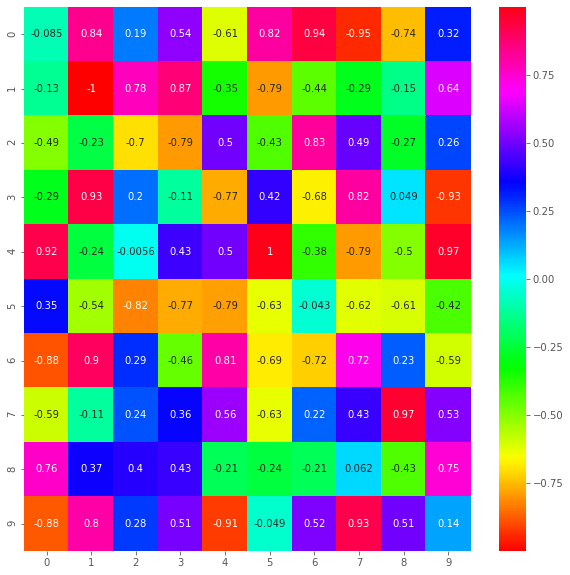

In [50]:
plt.figure(figsize=(10,10))

heatmap = sns.heatmap(matrix, cmap='hsv', annot=True)
plt.show()

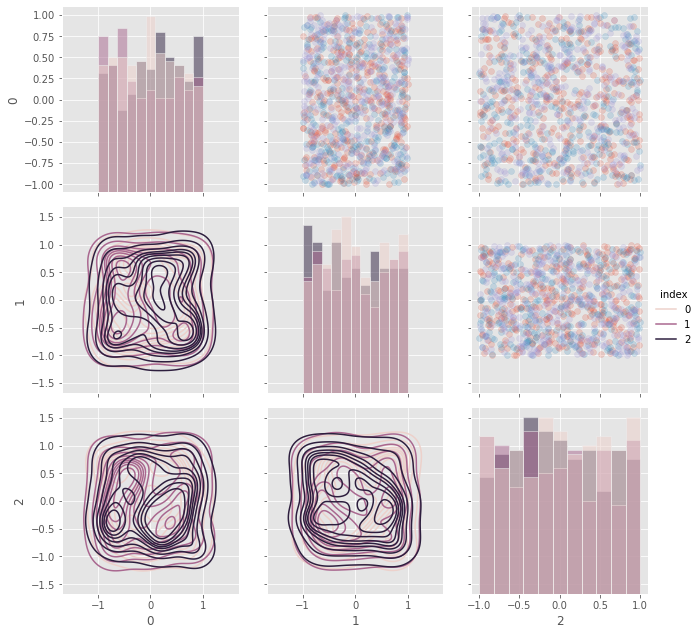

In [51]:
nrow = 1000
ncol = 3

matrix = np.random.random((nrow,ncol)) * np.random.choice([-1,1], size=(nrow,ncol))

# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow)
plot_data = pd.DataFrame(matrix, indice).reset_index()

# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False, 
                    hue = 'index', vars = [x for x in list(plot_data.columns) if x != 'index'])

grid.map_upper(plt.scatter, alpha = 0.2)
grid.map_diag(sns.histplot)
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

grid.add_legend()
plt.show()

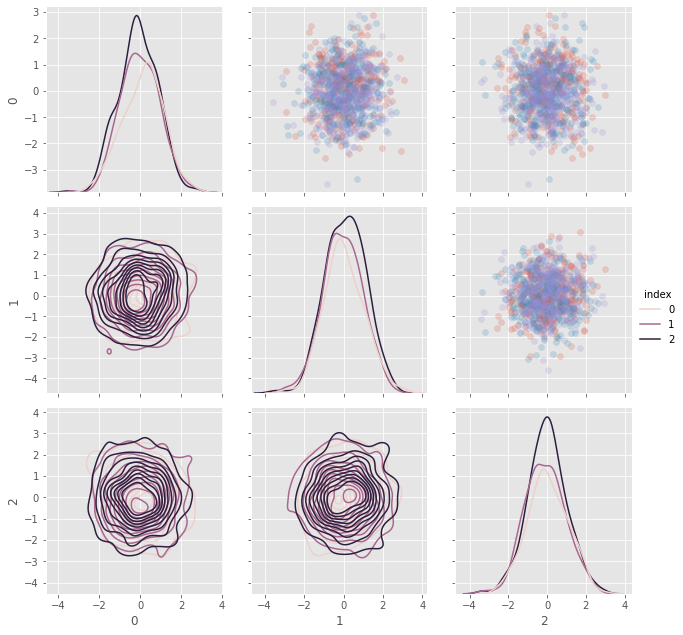

In [52]:
nrow = 1000
ncol = 3

matrix = np.random.normal(size=(nrow,ncol))

# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow)
plot_data = pd.DataFrame(matrix, indice).reset_index()

# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'index', vars = [x for x in list(plot_data.columns) if x != 'index'])

grid.map_upper(plt.scatter , alpha = 0.2)
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

grid.add_legend()
plt.show()